In [1]:
import pandas as pd
import numpy as np
from os.path import join
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ROOT_DIR = '/home/jovyan/crop-forecasting'

In [2]:
# train_df = pd.read_csv(join(ROOT_DIR, 'data', 'raw', 'train.csv'))
# test_df = pd.read_csv(join(ROOT_DIR, 'data', 'raw', 'test.csv'))

train_df = pd.read_csv(join(ROOT_DIR, 'data', 'interim', 'train_enriched.csv'))
test_df = pd.read_csv(join(ROOT_DIR, 'data', 'interim', 'test_enriched.csv'))

In [3]:
scaler = MinMaxScaler()
# scaler = StandardScaler()

In [4]:
train_df = train_df.drop(columns=['Date of Harvest', 'Rice Yield (kg/ha)'])
train_df = pd.get_dummies(train_df)
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)

test_df = test_df.drop(columns=['ID No', 'Date of Harvest', 'Predicted Rice Yield (kg/ha)'])
test_df = pd.get_dummies(test_df)
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

In [5]:
def compute_mean_dist(x):
    dist = 0
    for i, row in test_df.iterrows():
        dist += np.linalg.norm(x.to_numpy() - row.to_numpy())

    dist /= len(test_df)
    return dist


train_df['Distance'] = train_df.apply(compute_mean_dist, axis='columns')
train_df = train_df.sort_values('Distance')

<AxesSubplot:ylabel='Density'>

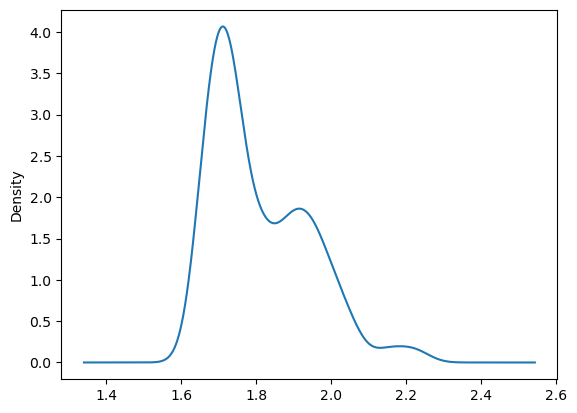

In [6]:
train_df.Distance.plot.kde()

In [7]:
# train_df = train_df[train_df.Distance <= 1.8]
# train_df.to_csv(join(ROOT_DIR, 'data', 'processed', 'train_index.csv'), columns=[], header=False)